### imports

In [1]:
import math
import time
from typing import List, Tuple

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import randint, uniform

from rdkit import Chem
from rdkit.Chem import Draw

from joblib import dump, load
import pickle

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    PredictionErrorDisplay as PED,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import (
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

In [2]:
X=pd.read_pickle("data/processed/calc_descriptors_final.pkl")
print("n_features: ", len(X.columns))

print(X['Ipc'].max(),X['Ipc'].min())
scaler = MinMaxScaler()
X['Ipc'] = scaler.fit_transform(X['Ipc'].values.reshape(-1,1))
print(X['Ipc'].max(),X['Ipc'].min())


scaler=StandardScaler().fit(X)
scaled=scaler.transform(X)

df=pd.read_pickle("data/processed/gap_smile.pkl")
y=df["GAP"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,random_state=42)

n_features:  56
219.2769658075064 1.0851048673387407
1.0 0.0


In [3]:
load_file='data/processed/reg_NN_MLP.joblib'
reg=load(load_file)
gap_pred=reg.predict(scaled)
print(len(gap_pred))
df["GAP_P"]=gap_pred
df_concat=pd.concat([df,X],axis=1,join='inner')
df_concat['diff']=df_concat['GAP']-df_concat['GAP_P']
df_concat

/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


406203


/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,GAP,SMILE,GAP_P,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,NumRadicalElectrons,AvgIpc,...,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine,diff
0,4.218750,CC(=C)C1C2OC(=O)C1C1(O)CC3OC33C(=O)OC2C13C,3.887645,13.421670,1.813652,-4.213449,93.904762,292.287,0,3.203010,...,0,0,0,0,4,2,0,0,0,0.331105
1,1.830078,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,1.460255,14.938999,0.626931,-6.373747,66.444444,660.651,0,3.295038,...,1,2,0,0,0,2,2,0,0,0.369824
2,1.650391,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,1.858951,15.674552,1.517576,-4.913705,45.409091,598.604,0,3.352137,...,0,1,0,0,6,1,2,0,0,-0.208561
3,1.730469,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,1.732663,15.162100,1.184590,-4.773941,45.804878,554.551,0,3.323824,...,0,1,0,0,6,1,2,0,0,-0.002194
4,3.580078,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,3.363940,14.690159,1.393863,-6.473465,57.538462,534.693,0,3.304427,...,0,0,0,0,1,3,0,0,0,0.216138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406198,3.970703,O=C(NCCN=C(O)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F...,3.877003,13.510691,1.513305,-7.333639,19.571429,452.142,0,2.615850,...,0,0,0,0,0,0,0,0,0,0.093700
406199,1.429688,O=C(O)C=CC1=C2NC(C=C3N=C(C=C4NC(=CC5=NC=6C(C(=...,1.545973,15.059651,0.354457,-4.267296,30.500000,588.664,0,4.039629,...,0,5,0,3,8,1,1,0,0,-0.116286
406200,3.130859,O[C]1[CH][C](O)[C]2[CH][C](OC3OC(CO)C(O)C(O)C3...,2.474674,9.735870,0.859880,-5.445191,72.090909,626.564,15,3.337697,...,0,0,0,0,1,0,0,0,0,0.656186
406201,1.839844,O=C(N)C1C(=O)C(N(C)C)C2CC3CC4=C(C(=O)C3C(=O)C2...,1.500383,15.164901,0.812307,-5.526028,60.818182,457.483,0,3.064037,...,1,0,1,0,3,0,4,0,0,0.339461


### range vs Outliers

In [6]:
def count_occurrences_in_symmetric_ranges_summarized(df, column_name, range_endpoints):
    """
    Calculates the number of occurrences within symmetrically generated ranges 
    around 0 in a DataFrame column, summarizing symmetric ranges and excluding (0,0).

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to analyze.
        range_endpoints (list of float): A list of *positive* range endpoints. 
                                          Must be sorted in ascending order.

    Returns:
        dict: A dictionary where keys are the *positive* range endpoints (float)
              and values are the *sum* of counts for the corresponding 
              symmetric ranges. Returns an empty dictionary if the column
              does not exist.
    """

    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return {}

    counts = {}
    previous_endpoint = 0  # Start with 0 as the initial lower bound

    for endpoint in range_endpoints:
        if endpoint != 0:  # Exclude (0,0) equivalent
            lower_bound_neg = -endpoint
            upper_bound_neg = -previous_endpoint  # Use the PREVIOUS endpoint as the upper bound for the negative range
            lower_bound_pos = previous_endpoint # Use the PREVIOUS endpoint as the lower bound for the positive range
            upper_bound_pos = endpoint

            count_neg = df[column_name].between(lower_bound_neg, upper_bound_neg, inclusive='both').sum()
            count_pos = df[column_name].between(lower_bound_pos, upper_bound_pos, inclusive='both').sum()
            total_count = count_neg + count_pos

            percentage = total_count / len(df) * 100 #if total_non_zero > 0 else 0  # Avoid division by zero

            counts[(lower_bound_pos, upper_bound_pos)] = {
                'count': total_count,
                'percentage': percentage
            }

        previous_endpoint = endpoint  # Update previous endpoint for the next iteration

    return counts

In [ ]:
results_abs={}
gap_ranges=[0.0, 0.1, 0.2, 0.4, 0.8, 1.2, 2.0, 10.0] 
num=0
for descr in df_concat.columns:
    if any(sub in descr for sub in ["Num","fr"]) and "NumRadicalElectrons" not in descr: #"Num", "fr"
        df_tmp= df_concat[df_concat[descr]>1]
        print(num,descr,type(descr), len(df_tmp))
        iqr_percentage=[]
        iqr_tot=[]
        outliers_abs= count_occurrences_in_symmetric_ranges_summarized(df_tmp,"diff",gap_ranges)
        results_abs[descr]=outliers_abs

0 NumAliphaticHeterocycles <class 'str'> 135257
    threshold: 0.0     outliers:  67628 ( 49.999630333365374  %)
    threshold: 0.5     outliers:  28508 ( 21.076912840000887  %)
    threshold: 1.0     outliers:  11545 ( 8.535602593581109  %)
    threshold: 1.5     outliers:  4758 ( 3.517747695128533  %)
    threshold: 2.0     outliers:  2134 ( 1.5777371965961096  %)
    threshold: 3.0     outliers:  591 ( 0.43694596213134995  %)
    threshold: 4.0     outliers:  180 ( 0.133079988466401  %)
    threshold: 6.0     outliers:  33 ( 0.02439799788550685  %)
    threshold: 8.0     outliers:  8 ( 0.005914666154062266  %)
    threshold: 10.0     outliers:  5 ( 0.0036966663462889167  %)
0 NumAromaticCarbocycles <class 'str'> 140225
    threshold: 0.0     outliers:  70112 ( 49.99964343020146  %)
    threshold: 0.5     outliers:  29778 ( 21.23587092173293  %)
    threshold: 1.0     outliers:  12221 ( 8.715279015867356  %)
    threshold: 1.5     outliers:  5142 ( 3.6669638081654483  %)
    threshol

In [10]:
iqr_df_tot=pd.DataFrame.from_dict(results_tot)
iqr_df=pd.DataFrame.from_dict(results)
iqr_df

,threshold,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumAromaticHeterocycles,fr_Al_COO,fr_Al_OH_noTert,fr_Ar_N,fr_NH0,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine
0,0.0,49.999630,49.999643,50.000000,50.008357,50.012850,50.001176,49.999362,50.005657,50.000580,50.012180,50.000000,49.999721,49.998932,50.000000,50.005349,50.005495
1,0.5,21.076913,21.235871,20.759281,20.457964,24.286816,20.739312,20.980190,21.020477,21.150343,20.828258,22.226578,21.259052,20.225559,21.160938,20.637638,20.639631
2,1.0,8.535603,8.715279,7.895152,8.256727,11.436649,8.155486,8.362992,8.937663,8.859056,8.331303,9.907879,8.677449,7.614755,8.648031,7.852787,7.978899
3,1.5,3.517748,3.666964,3.241666,3.108808,5.294269,3.334196,3.524549,4.378323,3.840665,3.568819,4.596237,3.635441,2.889976,3.853813,3.263079,3.417958
4,2.0,1.577737,1.610269,1.461773,1.153268,2.570033,1.543566,1.695304,2.387148,1.818224,1.619976,2.126617,1.610053,1.226050,1.670600,1.455012,1.769425
5,3.0,0.436946,0.390087,0.370701,0.317566,0.359805,0.392950,0.477083,0.644869,0.489656,0.633374,0.578205,0.429831,0.271269,0.390913,0.417246,0.604462
6,4.0,0.133080,0.121234,0.102534,0.066856,0.051401,0.117650,0.139043,0.203643,0.121834,0.267966,0.196002,0.141604,0.053399,0.077445,0.117685,0.208814
7,6.0,0.024398,0.022820,0.005258,0.016714,0.000000,0.009412,0.026788,0.056567,0.008122,0.036541,0.039200,0.021185,0.004272,0.000000,0.010699,0.109902
8,8.0,0.005915,0.003566,0.000000,0.016714,0.000000,0.000000,0.006378,0.000000,0.002321,0.000000,0.009800,0.007247,0.002136,0.000000,0.000000,0.043961
9,10.0,0.003697,0.001426,0.000000,0.016714,0.000000,0.000000,0.005102,0.000000,0.000000,0.000000,0.000000,0.003902,0.000000,0.000000,0.000000,0.043961


In [11]:
def separate_counts_and_percentages(data_dict):
    """
    Separates a dictionary with tuple keys and dictionaries as values 
    (containing 'count' and 'percentage') into two DataFrames.

    Args:
        data_dict (dict): The input dictionary.

    Returns:
        tuple: A tuple containing two pandas DataFrames: 
               (counts_df, percentages_df).
               Returns (None, None) if the input is not in the expected format 
               or if the input dictionary is empty.
    """

    if not isinstance(data_dict, dict) or not data_dict:  # Check for empty dict as well
        return None, None

    counts_data = {}
    percentages_data = {}

    for feature, ranges_dict in data_dict.items():
        feature_counts = {}
        feature_percentages = {}
        for range_tuple, metrics in ranges_dict.items():
            if isinstance(metrics, dict) and 'count' in metrics and 'percentage' in metrics:
                feature_counts[range_tuple] = metrics['count']
                feature_percentages[range_tuple] = metrics['percentage']
            else:
                return None, None  # Input format is incorrect

        counts_data[feature] = feature_counts
        percentages_data[feature] = feature_percentages

    counts_df = pd.DataFrame.from_dict(counts_data, orient='columns')
    percentages_df = pd.DataFrame.from_dict(percentages_data, orient='columns')

    return counts_df, percentages_df

In [12]:
count_df, percentage_df= separate_counts_and_percentages(results_abs)
#print(count_df.loc[(0.1,0.2)])
count_df

,,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumAromaticHeterocycles,fr_Al_COO,fr_Al_OH_noTert,fr_Ar_N,fr_NH0,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine
0.0,0.1,48257,58833,14453,1804,1028,15139,28015,2370,31096,3184,4850,69920,16476,9770,3434,3086
0.1,0.2,36767,39988,10627,1603,876,11475,21019,2021,23464,2308,2865,49934,12985,7411,2585,2333
0.2,0.4,35199,31700,9649,1660,1001,11347,20639,2537,22006,1986,1933,43588,12493,7009,2437,2539
0.4,0.8,13474,8962,2987,823,760,4055,7704,1514,8470,637,511,14450,4432,2642,796,989
0.8,1.2,1264,633,275,74,183,403,824,293,959,72,37,1218,381,242,79,116
1.2,2.0,267,102,44,16,42,76,174,92,183,22,7,241,48,42,16,27
2.0,10.0,29,7,1,3,1,4,18,12,5,1,1,22,2,0,0,9


In [13]:
percentage_df

,,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumAromaticHeterocycles,fr_Al_COO,fr_Al_OH_noTert,fr_Ar_N,fr_NH0,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine
0.0,0.1,35.678006,41.956142,37.998212,30.152098,26.419943,35.622015,35.736609,26.812988,36.081362,38.781973,47.530380,38.980226,35.192345,36.030388,36.739061,33.915815
0.1,0.2,27.183066,28.517026,27.939321,26.792579,22.513493,27.000635,26.812343,22.864577,27.225787,28.112058,28.077225,27.838080,27.735652,27.330727,27.655932,25.640180
0.2,0.4,26.023792,22.606525,25.368072,27.745278,25.726034,26.699452,26.327606,28.702342,25.534038,24.190012,18.943552,24.300201,26.684751,25.848208,26.072537,27.904165
0.4,0.8,9.961776,6.391157,7.853087,13.755641,19.532254,9.541401,9.827408,17.128634,9.827924,7.758831,5.007840,8.055839,9.466647,9.743325,8.516101,10.869326
0.8,1.2,0.934517,0.451417,0.722999,1.236838,4.703161,0.948258,1.051114,3.314855,1.112748,0.876979,0.362603,0.679032,0.813807,0.892462,0.845191,1.274865
1.2,2.0,0.197402,0.072740,0.115680,0.267424,1.079414,0.178828,0.221959,1.040842,0.212339,0.267966,0.068601,0.134357,0.102527,0.154890,0.171178,0.296736
2.0,10.0,0.021441,0.004992,0.002629,0.050142,0.025700,0.009412,0.022961,0.135762,0.005802,0.012180,0.009800,0.012265,0.004272,0.000000,0.000000,0.098912


In [14]:
def plot_with_connected_lines(df, iqr_column='threshold'):
    """
    Creates a plot with connected lines using Seaborn, annotating the last point of each line.

    Args:
        df: Pandas DataFrame. The DataFrame should have a column specified by iqr_column
            that will be used as the x-axis, and other columns that will be used as y-axes.
        iqr_column: The name of the column to use as the x-axis. Defaults to 'IQR'.
    """

    # Check if the IQR column exists
    if iqr_column not in df.columns:
        raise ValueError(f"Column '{iqr_column}' not found in DataFrame.")

    # Melt the DataFrame to long format for Seaborn
    df_melted = df.melt(id_vars=[iqr_column], var_name='Variable', value_name='Value')

    # Create the plot
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    plt.yscale('log')
    plt.xlim(1,11)
#    plt.ylim(10e-4,8e-2)
    ax = sns.lineplot(x=iqr_column, y='Value', hue='Variable', marker='o', data=df_melted, palette='Spectral')

#    # Annotate the last point of each line
#    for variable in df_melted['Variable'].unique():
#        subset = df_melted[df_melted['Variable'] == variable]
#        last_x = subset[iqr_column].iloc[-1]+0.1
#        last_y = subset['Value'].iloc[-1]
#        ax.annotate(variable, (last_x, last_y), textcoords="offset points", xytext=(0,10), ha='left') # Adjust offset as needed
    threshold = 1e-4

    # Annotate the last point of each line
    for variable in df_melted['Variable'].unique():
        subset = df_melted[df_melted['Variable'] == variable]

        # Find the last index where 'Value' > threshold
        valid_indices = subset[subset['Value'] > threshold].index
        if not valid_indices.empty:  # Check if any values are above the threshold
            last_valid_index = valid_indices[-1]
            last_x = subset.loc[last_valid_index, iqr_column] + 0.1
            last_y = subset.loc[last_valid_index, 'Value']
            ax.annotate(variable, (last_x, last_y), textcoords="offset points", xytext=(0,10), ha='left')
        else:
            print(f"No values above threshold for variable: {variable}")

    plt.xlabel(iqr_column)
    plt.ylabel('ratio of outliers')
    plt.title('outlier ratio')
    plt.grid(True, alpha=0.3)  # Add a subtle grid
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
    
    plt.show()

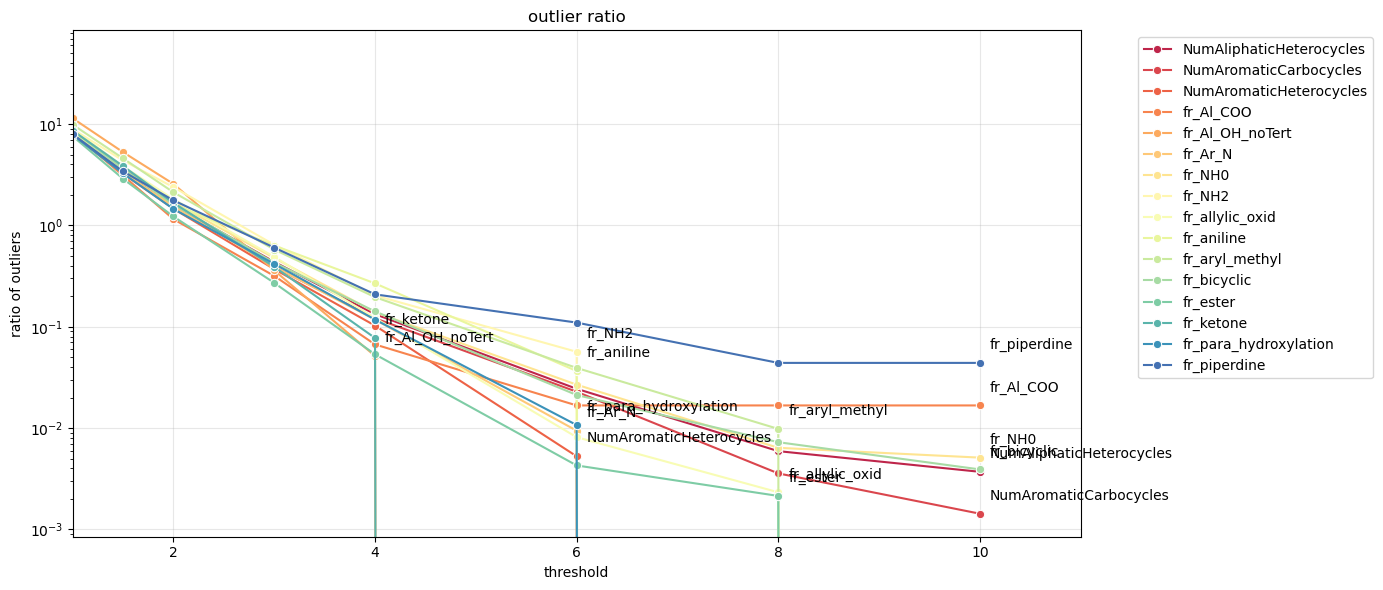

In [ ]:
# Call the plotting function -However this plot is too messy, better make a heatmap
plot_with_connected_lines(iqr_df)

In [16]:
# Set 'IQR' as the index
iqr_df_tot=iqr_df_tot.set_index('threshold')
iqr_df = iqr_df.set_index('threshold')

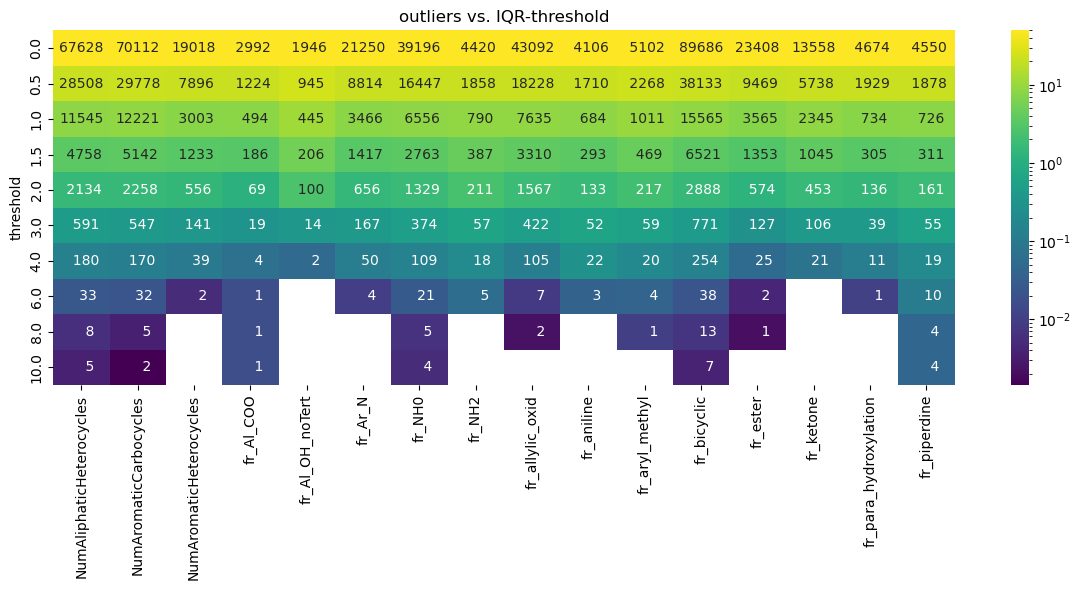

In [17]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

sns.heatmap(iqr_df, annot=iqr_df_tot, cmap="viridis", fmt='5g',norm=LogNorm()) # fmt=".4f" for 4 decimal places #5g

#plt.xlabel("Component")
plt.ylabel("threshold")
plt.title("outliers vs. IQR-threshold")
plt.tight_layout()
plt.savefig("iqr_vs_descriptor_outliers.png")
plt.show()


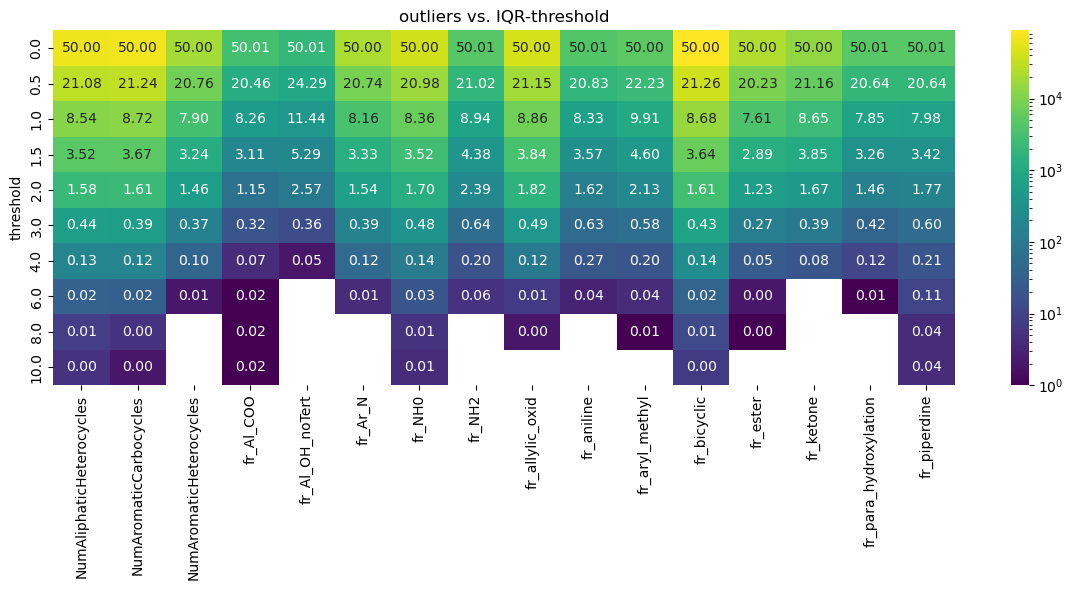

In [18]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

sns.heatmap(iqr_df_tot, annot=iqr_df, cmap="viridis", fmt='.2f',norm=LogNorm()) # fmt=".4f" for 4 decimal places #5g

#plt.xlabel("Component")
plt.ylabel("threshold")
plt.title("outliers vs. IQR-threshold")
plt.tight_layout()
#plt.savefig("iqr_vs_descriptor_outliers.png")
plt.show()

In [19]:
df_concat[(df_concat['diff']>1.0) | (df_concat['diff']<-1.0)]

/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,GAP,SMILE,GAP_P,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,NumRadicalElectrons,AvgIpc,...,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine,diff
30,3.080078,N=1OC=CC1C2=NOC(=C2)C=3ON=C(C3)C=4ON=C(C4)C5=N...,1.858949,8.614806,0.240128,-0.556503,15.000000,538.392,0,3.980739,...,0,0,0,0,0,0,0,0,0,1.221129
177,1.349609,O=C1C(=O)N(C=2C=CC=CC2)N(C=3C=CC=CC3)C1=O,2.404975,12.495922,0.137664,-1.672572,22.100000,266.256,0,2.925110,...,0,0,2,0,0,0,1,2,0,-1.055366
186,3.400391,O=C(OCC)C(O)(C(=O)OCC)C1C(=O)N(C=2C=CC=CC2)N(C...,2.178531,14.530790,0.477615,-5.021791,27.612903,426.425,0,3.212425,...,0,0,2,0,0,2,0,2,0,1.221860
404,2.650391,N=1N=C2C(OC(=C)N2C1)=C,1.560620,7.349815,0.006481,-0.665926,17.000000,135.126,0,2.660584,...,0,0,0,0,1,0,0,0,0,1.089771
1240,3.380859,ON1N=C2C=CC=CC2=N1,1.768862,7.490741,0.020139,-0.384694,17.000000,135.126,0,2.672015,...,0,0,0,0,1,0,0,0,0,1.611997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405988,1.400391,O=C(OCC)C[NH+]1CC2=CC(OC)=C(OC)C=C2CC1,2.577599,12.803251,1.468867,-4.551410,48.000000,280.344,0,2.728545,...,0,0,0,0,1,1,0,0,0,-1.177208
405998,2.939453,O[C]1[CH][CH][C]([CH][CH]1)[C]2[OH+][C]3[C]([C...,1.841575,10.701694,0.900756,-4.869596,66.076923,722.652,27,0.679516,...,0,0,0,0,2,0,0,0,0,1.097878
406092,1.049805,O=C(NC(C)(C)CC1CC(C)C2CCC(C)C3(CCC(=C)C1C23)[N...,2.091705,14.630150,1.197489,-6.548223,88.757576,459.675,0,3.166600,...,1,1,0,0,0,0,0,0,0,-1.041900
406150,1.549805,O=C1OC2(O)C3=C1C(=O)CCC3(C)C4(C=5NC=6C=CC=CC6C...,2.573359,13.603401,0.179489,-4.556521,61.851852,363.413,0,3.475414,...,0,0,0,0,6,1,1,1,0,-1.023555


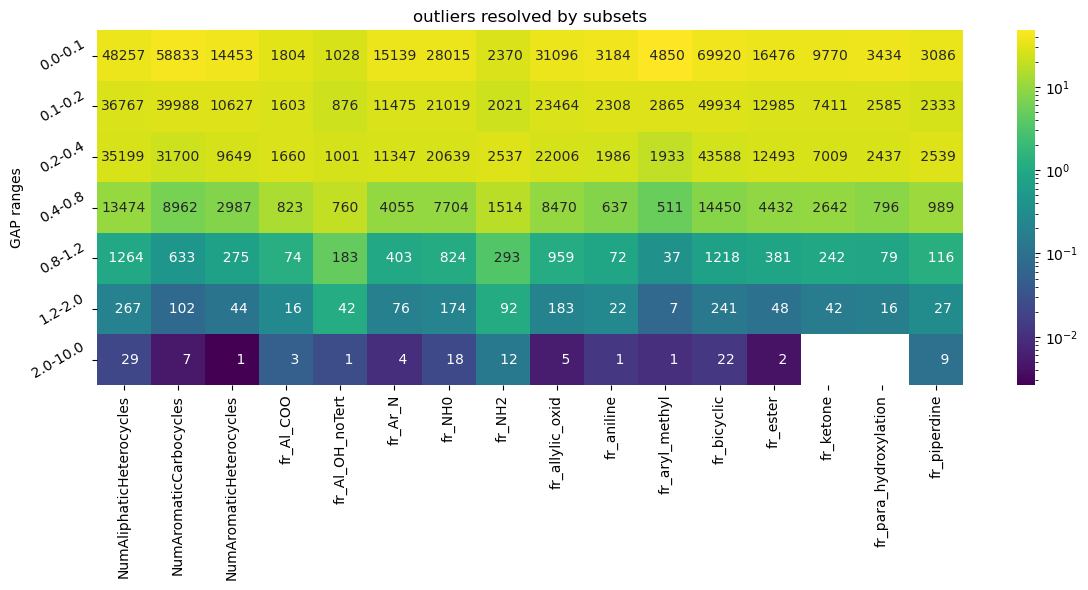

In [20]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

sns.heatmap(percentage_df, annot=count_df, vmin=0,vmax=50,cmap="viridis", fmt='5g',norm=LogNorm()) # fmt=".4f" for 4 decimal places #5g

#plt.xlabel("Component")
plt.ylabel("GAP ranges")
plt.yticks(rotation=30)
plt.title("outliers resolved by subsets")
plt.tight_layout()
plt.savefig("gap_range_vs_descriptor_outliers.png")
plt.show()

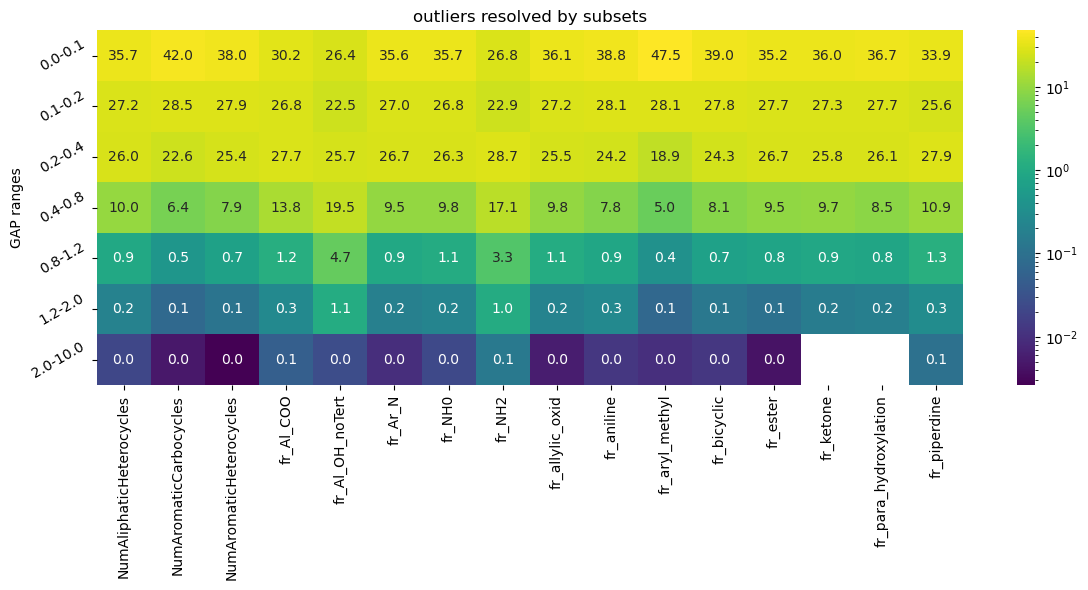

In [21]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

sns.heatmap(percentage_df,  annot=percentage_df,vmin=0,vmax=50,cmap="viridis", fmt='.1f',norm=LogNorm()) # fmt=".4f" for 4 decimal places #5g

#plt.xlabel("Component")
plt.ylabel("GAP ranges")
plt.yticks(rotation=30)
plt.title("outliers resolved by subsets")
plt.tight_layout()
plt.savefig("gap_range_vs_descriptor_outliers_percentage.png")
plt.show()

In [ ]:
# combined (summed) percentages for first 2 and 3 GAP ranges
for ii in range(2,4):
    print("first ",ii)
    for descr in percentage_df.columns:
        sum=percentage_df[descr].iloc[:ii].sum()
        print(descr,"{:.2f}".format(sum))

first  2
NumAliphaticHeterocycles 62.86
NumAromaticCarbocycles 70.47
NumAromaticHeterocycles 65.94
fr_Al_COO 56.94
fr_Al_OH_noTert 48.93
fr_Ar_N 62.62
fr_NH0 62.55
fr_NH2 49.68
fr_allylic_oxid 63.31
fr_aniline 66.89
fr_aryl_methyl 75.61
fr_bicyclic 66.82
fr_ester 62.93
fr_ketone 63.36
fr_para_hydroxylation 64.39
fr_piperdine 59.56
first  3
NumAliphaticHeterocycles 88.88
NumAromaticCarbocycles 93.08
NumAromaticHeterocycles 91.31
fr_Al_COO 84.69
fr_Al_OH_noTert 74.66
fr_Ar_N 89.32
fr_NH0 88.88
fr_NH2 78.38
fr_allylic_oxid 88.84
fr_aniline 91.08
fr_aryl_methyl 94.55
fr_bicyclic 91.12
fr_ester 89.61
fr_ketone 89.21
fr_para_hydroxylation 90.47
fr_piperdine 87.46
